# TFLite on Python
## Import modules


In [103]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Loading the trained model
Now a TFLite interpreter will be created, with the model being loaded upon the initialization of the interpreter. The input and output details of the model are then displayed.

In [104]:
interpreter = tf.lite.Interpreter("./pfld_growing68.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
output_details
input_details

[{'name': 'image_batch',
  'index': 0,
  'shape': array([  1, 112, 112,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

## Pre-processing of the input image
Here the image is converted into array of a specified size (img_row x img_column) and a particular colour channel is extracted.

(112, 112, 3)

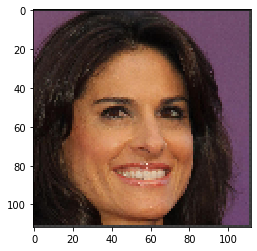

In [106]:
img = cv2.imread("image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
size = 112
img = cv2.resize(img, (size, size))
plt.imshow(img)
# red, green, blue = input_img.split()
img = img.astype(np.float32)
img = img / 256.0
img.shape


In [107]:
input_img = img[np.newaxis, :, :, :]
input_img.shape

(1, 112, 112, 3)

## Running the Interpreter
The input array is fed into the interpreter and the output is observed, as the output array.

In [108]:
interpreter.set_tensor(input_details[0]['index'], input_img)
interpreter.invoke()
pre_landmark = interpreter.get_tensor(output_details[0]['index'])
print(pre_landmark)

[[0.11000558 0.24282052 0.10471568 0.31567708 0.11938579 0.40230992
  0.13507573 0.50621265 0.19194418 0.62847877 0.27131695 0.779581
  0.36411932 0.8358237  0.4669563  0.87859666 0.5095022  0.8883921
  0.5658015  0.8670127  0.6417885  0.8331026  0.7683537  0.7378086
  0.83640987 0.62474376 0.88467985 0.4767445  0.89762706 0.3854966
  0.9176032  0.31478703 0.88211143 0.2692963  0.19373152 0.18421298
  0.26617566 0.11599281 0.3197508  0.10302357 0.37535453 0.11387596
  0.41514036 0.12148755 0.57612365 0.14932117 0.63853526 0.11189273
  0.7046071  0.18258242 0.74819523 0.12972693 0.7849632  0.15452431
  0.5249861  0.25954247 0.49864927 0.31037605 0.5270102  0.4054065
  0.51070905 0.47445917 0.4229712  0.4878997  0.49553922 0.52009827
  0.51708764 0.5418926  0.5515085  0.4978587  0.5887474  0.48466802
  0.25597772 0.25353968 0.29849896 0.22915992 0.3680958  0.23565765
  0.4165781  0.26749444 0.3653241  0.28423288 0.29126215 0.29175538
  0.5810494  0.269483   0.63651615 0.24357373 0.715386

In [109]:
pre_landmark = pre_landmark.reshape(-1, 2) * [size, size]
print(pre_landmark)

[[ 12.32062495  27.19589782]
 [ 11.72815645  35.35583258]
 [ 13.37120807  45.05871153]
 [ 15.1284821   56.69581699]
 [ 21.49774837  70.38962173]
 [ 30.3874979   87.31307316]
 [ 40.78136396  93.61225605]
 [ 52.29910421  98.40282631]
 [ 57.06424332  99.49991417]
 [ 63.36976814  97.10542011]
 [ 71.88031006  93.3074894 ]
 [ 86.05561447  82.63456154]
 [ 93.67790508  69.97130108]
 [ 99.08414364  53.39538431]
 [100.53423023  43.17561769]
 [102.77155781  35.25614738]
 [ 98.79648018  30.16118431]
 [ 21.69792986  20.63185406]
 [ 29.81167364  12.99119437]
 [ 35.81208801  11.53864026]
 [ 42.03970718  12.754107  ]
 [ 46.49572039  13.60660565]
 [ 64.52584934  16.72397089]
 [ 71.51594925  12.53198576]
 [ 78.91599846  20.44923139]
 [ 83.79786587  14.52941632]
 [ 87.91587734  17.30672288]
 [ 58.79844189  29.0687561 ]
 [ 55.84871817  34.76211739]
 [ 59.02514267  45.40552855]
 [ 57.1994133   53.13942719]
 [ 47.37277317  54.64476538]
 [ 55.50039244  58.25100613]
 [ 57.9138155   60.69196987]
 [ 61.76895046

In [110]:
pre_landmark.shape

(68, 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


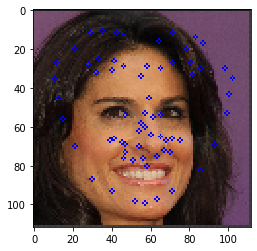

In [111]:
for (x, y) in pre_landmark.astype(np.int32):
    cv2.circle(img, (x, y), 1, (0, 0, 255))
plt.imshow(img)